# Fourier Transform and Spectral Analyses Lab

## Aliasing Errors

Aliasing occurs when a signal is sampled at a rate insufficient to capture its highest frequency components, causing high-frequency components to appear as lower frequencies.
In this section, we will demonstrate aliasing and determine the minimum sampling rate needed to avoid it.

Setup:
1. Generate a sinusoidal signal $s(t) = \cos(2\pi t)$.
2. Sample the signal at different rates and visualize the effect.

In [1]:
from matplotlib import pyplot as plt
import numpy as np

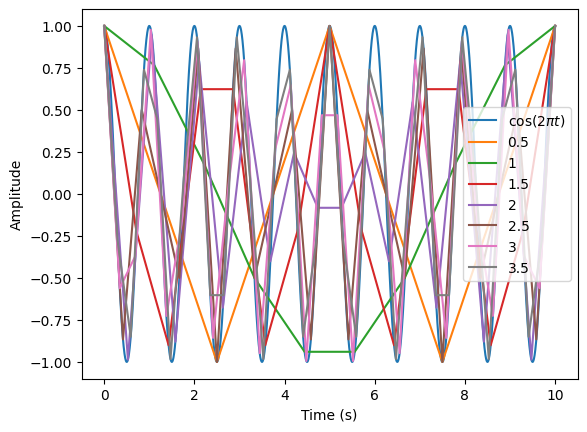

In [17]:
t = np.linspace(0, 10, num=2000) # use very high sampling rate to approximate the analytic function
s = np.cos(2 * np.pi * t) # periodic is 1
plt.plot(t, s, label=r'$\cos(2\pi t)$')

# HANDSON: write a loop to loop over different sampling rates
# for ...:
#    t = np.linspace(...)
#    s = np.cos(2 * np.pi * t)
#    plt.plot(t, s, label=...)

for n in [0.5, 1, 1.5, 2, 2.5, 3, 3.5]:
    t = np.linspace(0, 10, num=int(10*n))
    s = np.cos(2 * np.pi * t)
    plt.plot(t, s, label=n)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

`````{exercise}
From the figure, determine the minimal number of sampling points required per period to capture the correct frequency of the signal.

```
HANDSON: Your answer here...
```
`````

## Spectral Filtering

Spectral filtering involves transforming a signal into the frequency domain, modifying specific frequency components (e.g., removing noise), and transforming it back to the time domain.

In this section, we will implement a low-pass filter.
Setup:
1. Generate a noisy sinusoidal signal.
2. Transform the signal into the frequency domain using the Fast Fourier Transform (FFT).
3. Apply a low-pass filter to remove high-frequency noise.
4. Transform the filtered signal back to the time domain.

Text(0, 0.5, 'Amplitude')

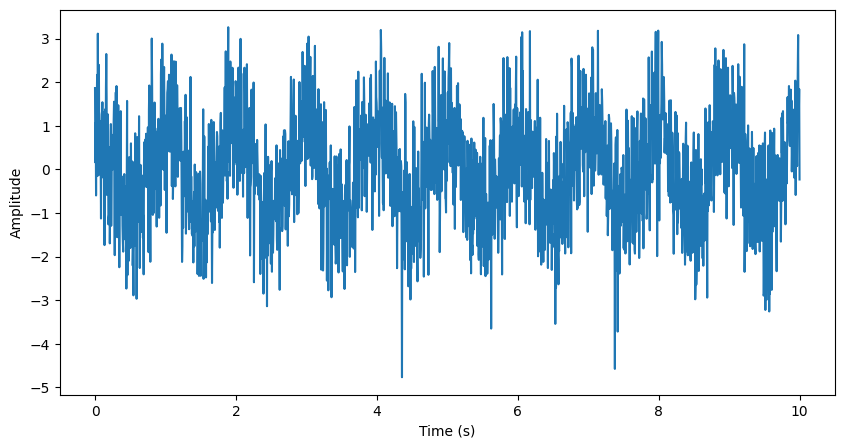

In [9]:
t = np.linspace(0, 10, num=2000) # use very high sampling rate to approximate the analytic function
s = np.cos(2 * np.pi * t) # periodic is 1

# Add noise
noisy = s + np.random.normal(size=t.shape)

# Visualize the signal with noise
plt.figure(figsize=(10, 5))
plt.plot(t, noisy)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Power')

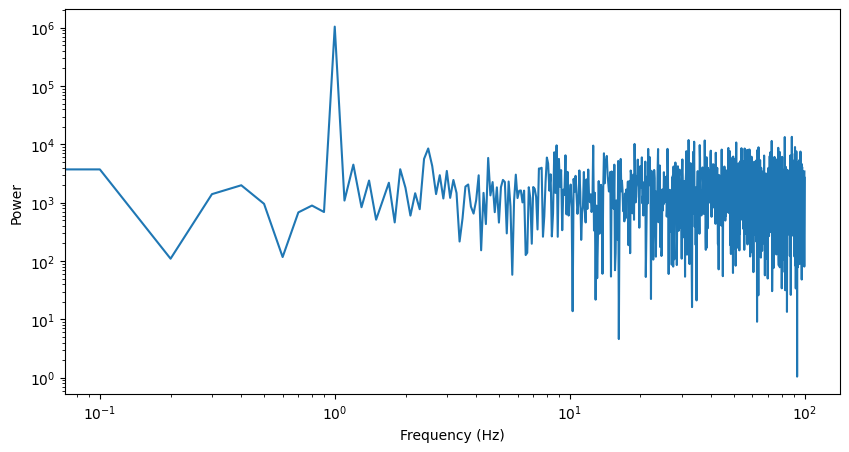

In [10]:
# Fourier Transform
f = np.fft.fftfreq(len(t), d=t[1])
Noisy = np.fft.fft(noisy)
Power = abs(Noisy[:len(t)//2])**2

plt.figure(figsize=(10, 5))
plt.loglog(f[:len(t)//2], Power)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

In [ ]:
# HANDSON: implement a low pass filter
...

# and inverse Fourier transform
filtered = ...

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(t, noisy, label='Noisy Signal', alpha=0.7)
if filtered is not ...:
    plt.plot(t, filtered, label='Filtered Signal', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()